# The Data Spartan

## Random Forest Regression on the Boston Dataset

In [53]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [54]:
# Importing the dataset
train = pd.read_csv('G:/Boston Housing/train.csv')
test = pd.read_csv('G:/Boston Housing/test.csv')

In [55]:
print(train.columns.values)

['ID' 'crim' 'zn' 'indus' 'chas' 'nox' 'rm' 'age' 'dis' 'rad' 'tax'
 'ptratio' 'black' 'lstat' 'medv']


In [56]:
print(test.columns.values)

['ID' 'crim' 'zn' 'indus' 'chas' 'nox' 'rm' 'age' 'dis' 'rad' 'tax'
 'ptratio' 'black' 'lstat']


In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [58]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 14 columns):
ID         173 non-null int64
crim       173 non-null float64
zn         173 non-null float64
indus      173 non-null float64
chas       173 non-null int64
nox        173 non-null float64
rm         173 non-null float64
age        173 non-null float64
dis        173 non-null float64
rad        173 non-null int64
tax        173 non-null int64
ptratio    173 non-null float64
black      173 non-null float64
lstat      173 non-null float64
dtypes: float64(10), int64(4)
memory usage: 19.0 KB


In [59]:
# There are no missing values, so we do not need to drop any columns or
# fill in those missing values

# Data Visualization

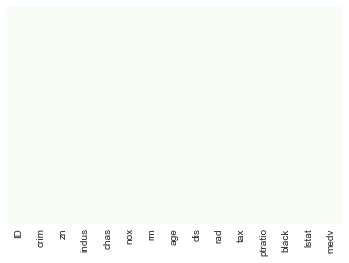

In [120]:
# Making sure that there are no missing values
# The following Heatmap will reveal the missing values. 
# Red lines indicate the missing values.
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap="Greens")

In [61]:
# No missing values

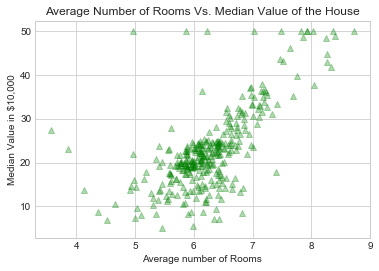

In [121]:
# Average Number of Rooms Vs. Median Value of the House
plt.scatter(train['rm'], train['medv'], marker='^', c = 'Green', alpha = 0.3)
plt.xlabel('Average number of Rooms')
plt.ylabel('Median Value in $10,000')
plt.title('Average Number of Rooms Vs. Median Value of the House')
plt.show()

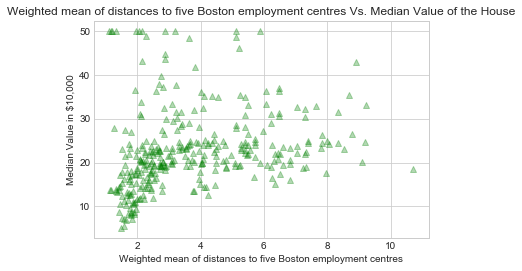

In [122]:
# Weighted mean of distances to five Boston employment centres Vs. Median Value of the House
plt.scatter(train['dis'], train['medv'], marker='^', c = 'Green', alpha = 0.3)
plt.xlabel('Weighted mean of distances to five Boston employment centres')
plt.ylabel('Median Value in $10,000')
plt.title('Weighted mean of distances to five Boston employment centres Vs. Median Value of the House')
plt.show()

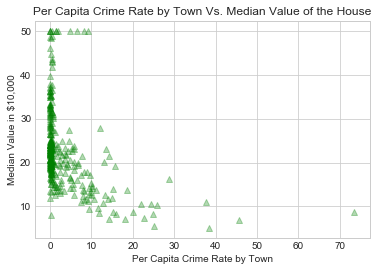

In [123]:
# Per Capita Crime Rate by Town Vs. Median Value of the House
plt.scatter(train['crim'], train['medv'], marker='^', c = 'Green', alpha = 0.3)
plt.xlabel('Per Capita Crime Rate by Town')
plt.ylabel('Median Value in $10,000')
plt.title('Per Capita Crime Rate by Town Vs. Median Value of the House')
plt.show()

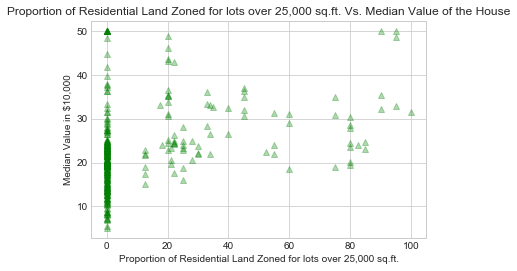

In [124]:
# Proportion of Residential Land Zoned for lots over 25,000 sq.ft. Vs. Median Value of the House
plt.scatter(train['zn'], train['medv'], marker='^', c = 'Green', alpha = 0.3)
plt.xlabel('Proportion of Residential Land Zoned for lots over 25,000 sq.ft.')
plt.ylabel('Median Value in $10,000')
plt.title('Proportion of Residential Land Zoned for lots over 25,000 sq.ft. Vs. Median Value of the House')
plt.show()

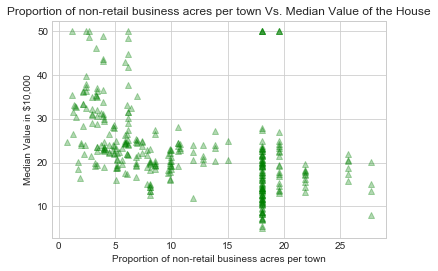

In [125]:
# Proportion of non-retail business acres per town Vs. Median Value of the House
plt.scatter(train['indus'], train['medv'], marker='^', c = 'Green', alpha = 0.3)
plt.xlabel('Proportion of non-retail business acres per town')
plt.ylabel('Median Value in $10,000')
plt.title('Proportion of non-retail business acres per town Vs. Median Value of the House')
plt.show()

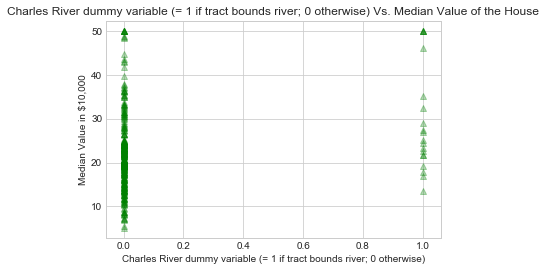

In [126]:
# Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) Vs. Median Value of the House
plt.scatter(train['chas'], train['medv'], marker='^', c = 'Green', alpha = 0.3)
plt.xlabel('Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)')
plt.ylabel('Median Value in $10,000')
plt.title('Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) Vs. Median Value of the House')
plt.show()

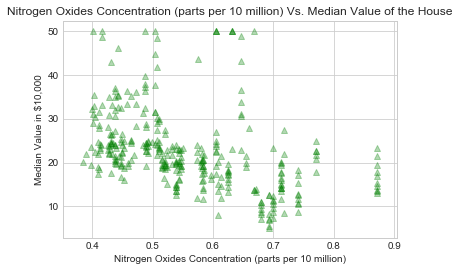

In [127]:
# Nitrogen Oxides Concentration (parts per 10 million) Vs. Median Value of the House
plt.scatter(train['nox'], train['medv'], marker='^', c = 'Green', alpha = 0.3)
plt.xlabel('Nitrogen Oxides Concentration (parts per 10 million)')
plt.ylabel('Median Value in $10,000')
plt.title('Nitrogen Oxides Concentration (parts per 10 million) Vs. Median Value of the House')
plt.show()

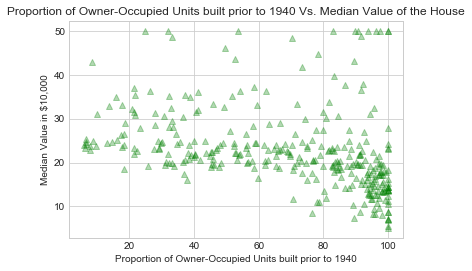

In [128]:
# Proportion of Owner-Occupied Units built prior to 1940 Vs. Median Value of the House
plt.scatter(train['age'], train['medv'], marker='^', c = 'Green', alpha = 0.3)
plt.xlabel('Proportion of Owner-Occupied Units built prior to 1940')
plt.ylabel('Median Value in $10,000')
plt.title('Proportion of Owner-Occupied Units built prior to 1940 Vs. Median Value of the House')
plt.show()

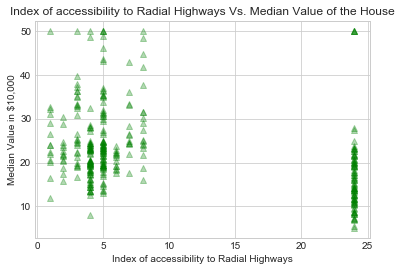

In [129]:
# Index of accessibility to Radial Highways Vs. Median Value of the House
plt.scatter(train['rad'], train['medv'], marker='^', c = 'Green', alpha = 0.3)
plt.xlabel('Index of accessibility to Radial Highways')
plt.ylabel('Median Value in $10,000')
plt.title('Index of accessibility to Radial Highways Vs. Median Value of the House')
plt.show()

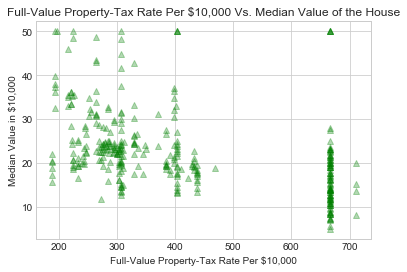

In [130]:
# Full-Value Property-Tax Rate Per \$10,000 Vs. Median Value of the House
plt.scatter(train['tax'], train['medv'], marker='^', c = 'Green', alpha = 0.3)
plt.xlabel('Full-Value Property-Tax Rate Per \$10,000')
plt.ylabel('Median Value in $10,000')
plt.title('Full-Value Property-Tax Rate Per \$10,000 Vs. Median Value of the House')
plt.show()

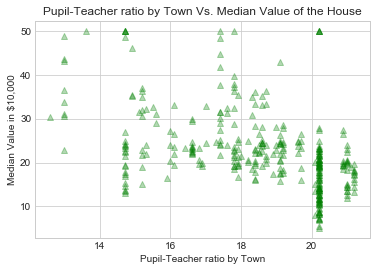

In [131]:
# Pupil-Teacher ratio by Town Vs. Median Value of the House
plt.scatter(train['ptratio'], train['medv'], marker='^', c = 'Green', alpha = 0.3)
plt.xlabel('Pupil-Teacher ratio by Town')
plt.ylabel('Median Value in $10,000')
plt.title('Pupil-Teacher ratio by Town Vs. Median Value of the House')
plt.show()

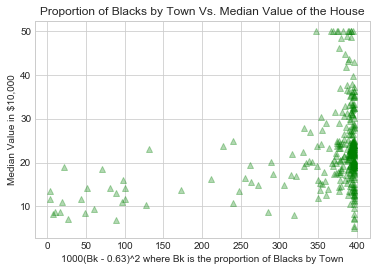

In [132]:
# Proportion of Blacks by Town Vs. Median Value of the House
plt.scatter(train['black'], train['medv'], marker='^', c = 'Green', alpha = 0.3)
plt.xlabel('1000(Bk - 0.63)^2 where Bk is the proportion of Blacks by Town')
plt.ylabel('Median Value in $10,000')
plt.title('Proportion of Blacks by Town Vs. Median Value of the House')
plt.show()

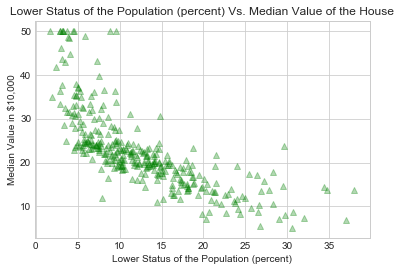

In [133]:
plt.scatter(train['lstat'], train['medv'], marker='^', c = 'Green', alpha = 0.3)
plt.xlabel('Lower Status of the Population (percent)')
plt.ylabel('Median Value in $10,000')
plt.title('Lower Status of the Population (percent) Vs. Median Value of the House')
plt.show()

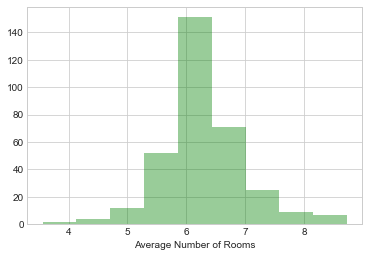

In [134]:
# Average Number of Rooms
sns.set_style('whitegrid')
sns.distplot(train['rm'], kde=False, color='Green', bins=9, axlabel = 'Average Number of Rooms')

## Model Training

In [76]:
X = train.iloc[:, 1:-1].values
y = train.iloc[:, -1].values
Y = test.iloc[:,1:].values

In [77]:
X.shape

(333, 13)

In [78]:
y.shape

(333,)

In [79]:
Y.shape

(173, 13)

In [80]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [135]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [136]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [137]:
predictions = regressor.predict(Y)

In [138]:
ID = test['ID']
test['ID'] = ID
test['medv'] = predictions

In [139]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 15 columns):
ID         173 non-null int64
crim       173 non-null float64
zn         173 non-null float64
indus      173 non-null float64
chas       173 non-null int64
nox        173 non-null float64
rm         173 non-null float64
age        173 non-null float64
dis        173 non-null float64
rad        173 non-null int64
tax        173 non-null int64
ptratio    173 non-null float64
black      173 non-null float64
lstat      173 non-null float64
medv       173 non-null float64
dtypes: float64(11), int64(4)
memory usage: 20.4 KB


In [140]:
test.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,35.45
1,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,24.69
2,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,15.82
3,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,14.63
4,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,17.63


In [141]:
test[['ID', 'medv']].to_csv('G:/Boston Housing/First_Random_Forest_Regression.csv', index=False)